In [1]:
%%html
<link rel="stylesheet" href="static/hyrule.css" type="text/css">

In [2]:
# Imports numpy as np and matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import feature_selection as f_select
from sklearn import cross_validation as cv
from sklearn import metrics
from __future__ import division
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('ggplot')
from sklearn.neighbors import KNeighborsClassifier

In [4]:
ames = pd.read_csv("../data/ames_train.csv", header=0, na_values="?")

In [5]:
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
ames.describe()

/Users/Darin/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,NaN,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,NaN,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,NaN,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
neighborhood_groups = ames.groupby("Neighborhood")
neighborhood_groups.SalePrice.agg(["min", "max", "mean"]).sort_values(by="mean")

,min,max,mean
Neighborhood,,,
MeadowV,75000,151400,98576
IDOTRR,34900,169500,100123
BrDale,83000,125000,104493
BrkSide,39300,223500,124834
Edwards,58500,320000,128219
OldTown,37900,475000,128225
Sawyer,62383,190000,136793
Blueste,124000,151000,137500
SWISU,60000,200000,142591


In [8]:
ames['Neighborhood'] = ames.Neighborhood.map({'MeadowV':0, 'IDOTRR':1, 'BrDale':2, 'BrkSide':3, 'Edwards':4, 'OldTown':5, 'Sawyer':6, 'Blueste':7, 'SWISU':8, 'NPkVill':9, 'Names':10, 'Mitchel':11, 'SawyerW':12, 'NWAmes':13, 'Gilbert':14, 'Blmngtn':15, 'CollgCr':16, 'Crawfor':17, 'ClearCr':18, 'Somerst':19, 'Veenker':20, 'Timber':21, 'StoneBr':22,'NridgHt':23, 'NoRidge':24})

In [9]:
print(ames.shape)

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
ames_numerics = ames.select_dtypes(include=numerics)
print(ames_numerics.shape)

# pd.isnull(ames_numerics).any()

(1460, 81)
(1460, 39)


In [10]:
# Below we are dropping features that have NA values. 

ames_numerics = ames_numerics.drop(["LotFrontage", "MasVnrArea", "GarageYrBlt"], axis=1)

ames_numerics = ames_numerics.dropna()
print(ames_numerics.shape)

ames_numerics.head()

(1235, 36)


,Id,MSSubClass,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,16.0,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,20.0,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,16.0,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,17.0,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,24.0,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [11]:
ames_numerics.corr().sort_values(by="SalePrice", ascending=False)

,Id,MSSubClass,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.017959,-0.134144,0.261218,0.700119,0.788086,-0.086069,0.514285,0.506096,0.403810,0.006499,0.207453,0.636150,0.628385,0.292582,-0.038736,0.708988,0.241710,-0.008112,0.555116,0.274368,0.170719,-0.134206,0.536355,0.484274,0.659198,0.643709,0.324170,0.313908,-0.154606,0.045747,0.119098,0.089394,-0.018431,0.058676,-0.037698,1.000000
OverallQual,-0.019254,-0.016137,0.097448,0.680527,1.000000,-0.103642,0.573508,0.559558,0.254214,-0.047833,0.305770,0.558850,0.499264,0.260582,-0.050511,0.584804,0.109990,-0.033766,0.552462,0.264542,0.108540,-0.171246,0.429025,0.404269,0.626694,0.589004,0.235836,0.304569,-0.156903,0.031667,0.056544,0.053090,-0.049883,0.091137,-0.033558,0.788086
GrLivArea,0.013693,0.021269,0.260126,0.419923,0.584804,-0.054677,0.188742,0.276198,0.225734,0.009411,0.220718,0.462667,0.568554,0.677589,0.122823,1.000000,0.045041,-0.029548,0.617827,0.406505,0.525621,0.094097,0.826049,0.466391,0.474657,0.484689,0.250319,0.342568,-0.011956,0.023940,0.110310,0.157849,0.054601,0.068114,-0.055205,0.708988
Neighborhood,0.001160,-0.084800,0.182764,1.000000,0.680527,-0.221548,0.673626,0.534688,0.264348,-0.010442,0.207050,0.483011,0.431493,0.128007,-0.092200,0.419923,0.168907,-0.020540,0.506763,0.225373,0.038670,-0.141151,0.287244,0.348529,0.600228,0.550693,0.234261,0.204345,-0.230359,0.028191,0.020645,-0.010411,-0.055004,0.063832,-0.029132,0.700119
GarageCars,0.013203,-0.087108,0.157599,0.600228,0.626694,-0.206494,0.553416,0.445967,0.253874,-0.016614,0.212925,0.475791,0.468924,0.162235,-0.109871,0.474657,0.146634,-0.026576,0.476005,0.215716,0.079694,-0.084914,0.363689,0.328101,1.000000,0.893373,0.248470,0.220724,-0.171895,0.028007,0.050868,0.016467,-0.032351,0.045979,-0.056800,0.659198
GarageArea,0.018793,-0.138246,0.182857,0.550693,0.589004,-0.176741,0.493587,0.391676,0.318680,-0.013303,0.190888,0.523123,0.518376,0.126941,-0.084281,0.484689,0.185996,-0.040716,0.418076,0.167898,0.063399,-0.084082,0.347232,0.293918,0.893373,1.000000,0.248803,0.255163,-0.145873,0.023812,0.059905,0.050945,-0.012385,0.032169,-0.038920,0.643709
TotalBsmtSF,-0.010196,-0.259142,0.266246,0.483011,0.558850,-0.172484,0.408994,0.328760,0.535275,0.096920,0.401680,1.000000,0.838501,-0.192078,-0.040234,0.462667,0.314021,-0.005022,0.341332,-0.072624,0.018327,-0.070363,0.282300,0.353700,0.475791,0.523123,0.244769,0.262198,-0.119958,0.028065,0.078125,0.133944,-0.016097,0.018652,-0.037873,0.636150
1stFlrSF,0.024275,-0.279362,0.299328,0.431493,0.499264,-0.145026,0.301327,0.276873,0.463153,0.095709,0.316932,0.838501,1.000000,-0.212497,-0.016779,0.568554,0.254954,-0.003204,0.390051,-0.145090,0.101224,0.056930,0.403828,0.420012,0.468924,0.518376,0.254257,0.231138,-0.075693,0.055113,0.086904,0.142034,-0.012078,0.036539,-0.038501,0.628385
FullBath,0.004331,0.059176,0.123397,0.506763,0.552462,-0.171576,0.469297,0.439316,0.080818,-0.055331,0.273715,0.341332,0.390051,0.394446,-0.016526,0.617827,-0.042089,-0.048578,1.000000,0.126907,0.385547,0.093982,0.548669,0.261256,0.476005,0.418076,0.181090,0.261319,-0.137268,0.027806,0.013513,0.041335,0.034435,0.062583,-0.019619,0.555116
TotRmsAbvGrd,0.017932,-0.018751,0.188354,0.287244,0.429025,-0.034663,0.083755,0.188996,0.052112,-0.021566,0.233767,0.282300,0.403828,0.615060,0.134218,0.826049,-0.052421,-0.043955,0.548669,0.334262,0.672760,0.229305,1.000000,0.341788,0.363689,0.347232,0.165412,0.244896,0.006801,-0.012620,0.064954,0.082556,0.097037,0.047930,-0.049876,0.536355


In [12]:
ames_numerics.corr()["Neighborhood"].sort_values(ascending=False)

Neighborhood     1.000000
SalePrice        0.700119
OverallQual      0.680527
YearBuilt        0.673626
GarageCars       0.600228
GarageArea       0.550693
YearRemodAdd     0.534688
FullBath         0.506763
TotalBsmtSF      0.483011
1stFlrSF         0.431493
GrLivArea        0.419923
Fireplaces       0.348529
TotRmsAbvGrd     0.287244
BsmtFinSF1       0.264348
WoodDeckSF       0.234261
HalfBath         0.225373
BsmtUnfSF        0.207050
OpenPorchSF      0.204345
LotArea          0.182764
BsmtFullBath     0.168907
2ndFlrSF         0.128007
MoSold           0.063832
BedroomAbvGr     0.038670
3SsnPorch        0.028191
ScreenPorch      0.020645
Id               0.001160
PoolArea        -0.010411
BsmtFinSF2      -0.010442
BsmtHalfBath    -0.020540
YrSold          -0.029132
MiscVal         -0.055004
MSSubClass      -0.084800
LowQualFinSF    -0.092200
KitchenAbvGr    -0.141151
OverallCond     -0.221548
EnclosedPorch   -0.230359
Name: Neighborhood, dtype: float64

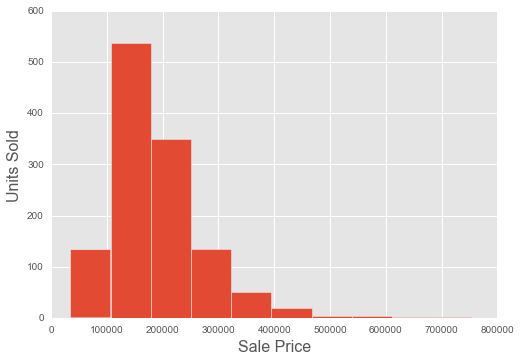

In [13]:
plt.xlabel('Sale Price', fontsize=16)
plt.ylabel('Units Sold', fontsize=16)
ames_numerics.SalePrice.hist()

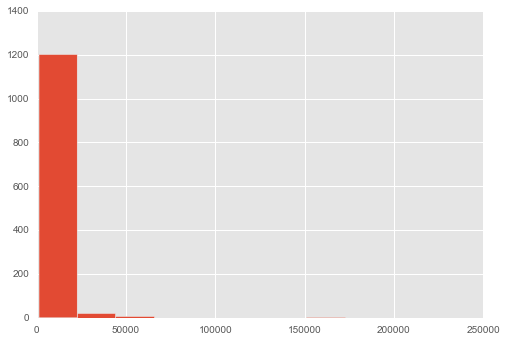

In [14]:
ames_numerics.LotArea.hist()

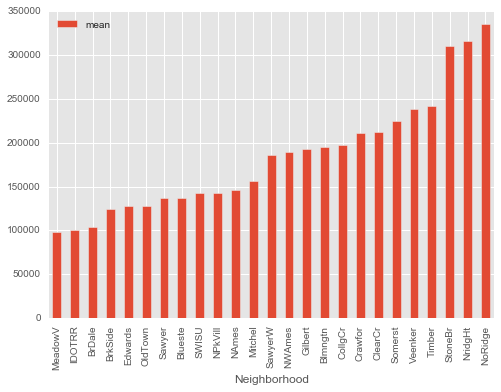

In [15]:
neighborhood_groups.SalePrice.agg(["mean"]).sort_values(by="mean").plot(kind="bar")

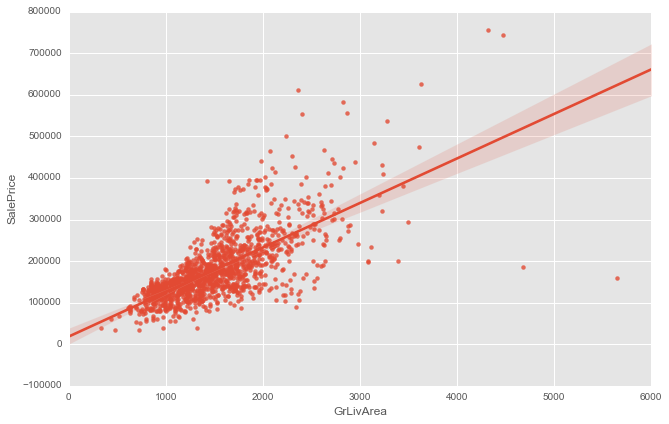

In [16]:
sns.pairplot(ames, x_vars='GrLivArea', y_vars='SalePrice', size=6, aspect=1.5, kind='reg')

In [17]:
feature_cols = ['GrLivArea']
X = ames_numerics[feature_cols]
y = ames_numerics.SalePrice

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# define a function that accepts X and y and computes testing RMSE
def cross_val_rmse(X, y):
    linreg = LinearRegression()
    scores = cv.cross_val_score(linreg, X, y, cv=5, scoring='mean_squared_error')
    return np.sqrt(abs(scores)).mean() # return average RMSE

feature_cols = ['GrLivArea', 'Neighborhood', 'LotArea']
X = ames_numerics[feature_cols]
cross_val_rmse(X, y)

45898.17419856575

In [19]:
# define a function that accepts X and y and computes testing RMSE
def cross_val_rmse(X, y):
    linreg = LinearRegression()
    scores = cv.cross_val_score(linreg, X, y, cv=5, scoring='mean_squared_error')
    return np.sqrt(abs(scores)).mean() # return average RMSE

In [20]:
feature_cols = ['GrLivArea', 'LotArea', 'Neighborhood']
X = ames_numerics[feature_cols]
cross_val_rmse(X, y)

45898.174198565204

In [21]:
x_train, x_test, y_train, y_test = cv.train_test_split(ames_numerics[["GrLivArea", "LotArea", "Neighborhood"]],
                                                           ames_numerics["SalePrice"],
                                                           test_size=0.333,
                                                           random_state=1234)


model = LinearRegression().fit(x_train, y_train)

In [22]:
sum_squares_regr = np.sum((model.predict(x_train) - np.mean(y_train))**2)
total_sum_squares = np.sum((y_train - np.mean(y_train))**2)
r_squared = sum_squares_regr / total_sum_squares

print(r_squared)

0.716832283475


In [23]:
x_columns = list(ames_numerics.columns)
y_column = "SalePrice"
x_columns.remove(y_column)

# The goal of this for loop is to establish statistically significant columns and only work with those.
# Note: I had to run .dropna() on ames_numerics (implemented several cells above) to get this for loop to work.
significant_columns = []
nonsignificant_columns = []
pvals = []
nonsignificant_pvals = []
for feature in x_columns:
    pval = f_select.f_regression(ames_numerics[[feature]], ames_numerics[y_column])
    if pval[1][0] < 0.05:
        significant_columns.append(feature)
        pvals.append(pval[1][0])
    else:
        nonsignificant_columns.append(feature)
        nonsignificant_pvals.append(pval[1][0])

print(significant_columns)
print(pvals)

x_train, x_test, y_train, y_test = cv.train_test_split(ames_numerics[significant_columns],
                                                           ames_numerics[y_column],
                                                           test_size=0.333,
                                                           random_state=1234)

model = LinearRegression().fit(x_train, y_train)

print(pd.DataFrame({
    'column': significant_columns,
    'coef': model.coef_,
    'p-value': pvals,
}).set_index('column').sort_values(by='p-value'))

print(pd.DataFrame({
    'column': nonsignificant_columns,
    'p-value': nonsignificant_pvals,
}).set_index('column').sort_values(by='p-value'))

print(model.score(x_train, y_train))
print(metrics.r2_score(y_train, model.predict(x_train)))
print(model.score(x_test, y_test))
print(metrics.r2_score(y_test, model.predict(x_test)))

['MSSubClass', 'LotArea', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MoSold']
[2.236383768621573e-06, 1.0284586716449589e-20, 1.3816563838750158e-182, 4.3110720725434669e-262, 0.0024679189760883403, 2.4904903810145363e-84, 2.6780275489978245e-81, 1.2267541587104308e-49, 1.7944137129364619e-13, 4.8206488496862249e-141, 1.1696732527903408e-136, 8.428358153151825e-26, 3.0925402834349257e-189, 7.0712809725575046e-18, 9.4867564932254477e-101, 9.1150458215912749e-23, 1.5621839038472568e-09, 2.2125065515920969e-06, 6.3331284277778979e-93, 1.3032647303109405e-73, 7.7878628871946089e-155, 1.9552577304732444e-145, 1.3053485039727619e-31, 1.2061166253956408e-29, 4.7447770105083842e-08, 2

In [24]:
len(significant_columns)

28

In [25]:
feature_cols = significant_columns
X = ames_numerics[feature_cols]
cross_val_rmse(X, y)

37419.654273340304

In [26]:
sum_squares_regr = np.sum((model.predict(x_train) - np.mean(y_train))**2)
total_sum_squares = np.sum((y_train - np.mean(y_train))**2)
r_squared = sum_squares_regr / total_sum_squares

print(r_squared)

0.82540601697


In [27]:
# Try to predict Neighborhood using logistic regression
logreg = LogisticRegression()
feature_cols = ["OverallQual"]
X = ames_numerics[feature_cols]
y = ames_numerics.Neighborhood
logreg.fit(X, y)
Neighborhood_pred_class = logreg.predict(X)

In [28]:
Neighborhood_pred_class

array([ 16.,  16.,  16., ...,  16.,  16.,   5.])

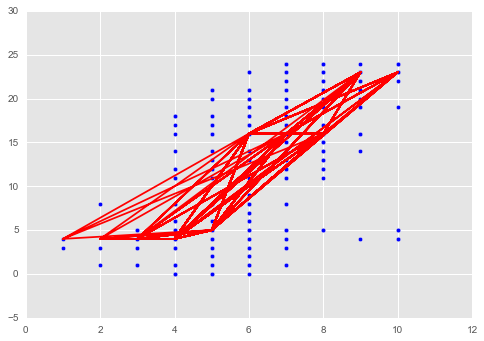

In [29]:
plt.scatter(ames_numerics[feature_cols], ames_numerics.Neighborhood)
plt.plot(ames_numerics[feature_cols], Neighborhood_pred_class, color='red')

In [30]:
preds = logreg.predict(X)
print(metrics.confusion_matrix(y, preds))

[[  0   0   0   0  10   6   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   0   0   0]
 [  0   0   0   0  16  11   0   0   0   0   0   0   0   0   0  10   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   5   0   0   0   0   0   0   0   0   0  11   0   0
    0   0   0   0   0   0]
 [  0   0   0   0  15  21   0   0   0   0   0   0   0   0   0  22   0   0
    0   0   0   0   0   0]
 [  0   0   0   0  31  38   0   0   0   0   0   0   0   0   0  28   0   0
    0   0   0   0   3   0]
 [  0   0   0   0  23  47   0   0   0   0   0   0   0   0   0  41   0   0
    0   0   0   0   2   0]
 [  0   0   0   0   9  54   0   0   0   0   0   0   0   0   0  11   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   3   9   0   0   0   0   0   0   0   0   0  13   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   9   0   0
    0   0   0   0

In [31]:
# Clearly not a good model to use in this case
print(metrics.classification_report(y, preds))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        17
        1.0       0.00      0.00      0.00        37
        2.0       0.00      0.00      0.00        16
        3.0       0.00      0.00      0.00        58
        4.0       0.26      0.31      0.28       100
        5.0       0.17      0.42      0.24       113
        6.0       0.00      0.00      0.00        74
        7.0       0.00      0.00      0.00         2
        8.0       0.00      0.00      0.00        25
        9.0       0.00      0.00      0.00         9
       11.0       0.00      0.00      0.00        49
       12.0       0.00      0.00      0.00        59
       13.0       0.00      0.00      0.00        73
       14.0       0.00      0.00      0.00        79
       15.0       0.00      0.00      0.00        17
       16.0       0.15      0.79      0.26       150
       17.0       0.00      0.00      0.00        51
       18.0       0.00      0.00      0.00   

/Users/Darin/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)

In [33]:
X, y = ames_numerics[["GrLivArea", "Neighborhood"]], ames_numerics['SalePrice'] #recall axis 1 means columns
knn.fit(X, y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [34]:
knn.score(X, y)

0.33036437246963563